In [18]:
# We demonstrate how to use ellc to generate light curves from inputting binary star system parameters 
# relating to the radii, semi-major axis, inclination angle, surface brightness ratio, etc 
# below is a basic turotial to get you started with using ellc
# For a more detailed explanation you can refer to: https://github.com/pmaxted/ellc/blob/master/lc.py

In [17]:
# import the nexessary packages:
import numpy as np
import matplotlib.pyplot as plt
import ellc

## Generating a light curve with basic parameters

In [10]:
# generate timestamps
t = np.arange(0, 50, 0.05)

In [11]:
# We start off by setting the most basic parameters for ELLC's lightcurve model

scaling_factor = 2
radius_1 = 0.3 # this is the ratio between star 1's radius and the semi-major axis for the system, meaning that 0.0 < radius_1 < 1.0
radius_2 = 0.3 # radius of the other star in the binary system
incl = 85 # viewing angle between the observer's line-of-sight and the normal to the plane of orbit. (90 degrees means that the two stars are exactly aligned in your line of sight)
t_zero = 3 # timestamp for a primary eclipse to happen. Adjust this parameter to time-shift the light curve.
sbratio = 0.1 # surface brightness ratio between star 2 and star 1.
period = 20

# note that there is no specified units for the period and t_zero, they can be treated in units of time or as a phase (unitless)

model = scaling_factor * ellc.lc(
    t_obs=t,
    radius_1=radius_1,
    radius_2=radius_2,
    incl=incl,
    t_zero=t_zero,
    sbratio=sbratio,
    period=period,
)

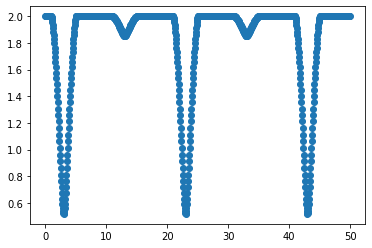

In [12]:
# Plot the synthetically generated light curve.
# The plot shows the primary eclipses happening at t_zero and subsequent times offset by multiples of the period
# The graph is overall flat outside the eclipses-- this will change once we add in more parameters such as in the next section!
plt.scatter(t, model)

## Adding more parameters into the mix

In [13]:
# For example, we can specify the shape parameters of the star (shape_1 and shape_2). 
# The default settings model the stars as rigid, non-deformable objects, but setting the shape parameters
# to 'roche' allows ELLC to model star deformations from the gravitational forces that exist between the stars.
scaling_factor = 2
radius_1 = 0.3
radius_2 = 0.3
incl = 85
t_zero = 0.5
sbratio = 10
period = 20


model = scaling_factor * ellc.lc(
    t_obs=t,
    radius_1=radius_1,
    radius_2=radius_2,
    incl=incl,
    t_zero=t_zero,
    sbratio=sbratio,
    shape_1="roche",
    shape_2="roche",
    period=period,
)

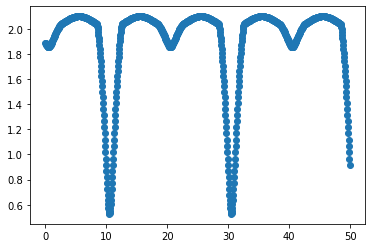

In [14]:
# As a result, the light curves have rounded sections outside the eclipses due to the contributions of flux from the stars' deformations.
plt.scatter(t, model)

In [15]:
# There are many, many more parameters you can add in to the model (relating to heat, reflection, gravity-darkening, eccentricity, etc.)
# You may explore how these additional parameters affect the light curve if you decide to spend additional time exploring ELLC, but
# they will not be necessary for this lab.
# To see the complete list of these parameters as well as an explanation for them refer to the documenation linked at the top of this module.

# We saw how the shape parameter affects the model above; let's explore one more parameters below.
# We will leave the rest of exploration up to you!

# Let's see how adding new parameters, heat_1 and heat_2, affect the light curve from the previous section.
scaling_factor = 2
radius_1 = 0.3
radius_2 = 0.3
incl = 85
t_zero = 0.5
sbratio = 10
period = 20
heat_1 = 10
heat_2 = 6

model = scaling_factor * ellc.lc(
    t_obs=t,
    radius_1=radius_1,
    radius_2=radius_2,
    incl=incl,
    t_zero=t_zero,
    sbratio=sbratio,
    heat_1=heat_1,
    heat_2=heat_2,
    period=period,
    shape_1 = 'roche', 
    shape_2 = 'roche',
)

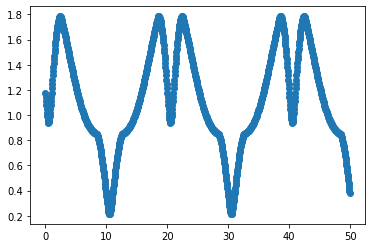

In [16]:
# Notice how the new heat parameters affect the curvature of the light curve.
# The sections outside the eclipses are no longer flat. This is due to the added effects of light from one star reflecting off its companion star, which
# are related to the heat coefficients.
plt.scatter(t, model)